##### IMPORT THE LIBRARIES

In [324]:
# import the file 
import numpy as np
import matplotlib.pyplot as plt

#### PERCEPTRON SINGLE LAYER MODEL

In [325]:
# CREATING CLASS FOR PERCEPTRON

class Perceptron:
    def __init__(self,num_inputs,learning_rate=0.01):
        self.weights=np.random.rand(num_inputs+1)
        self.learning_rate=learning_rate

    def weighted_sum(self,inputs):
        sum=0
        sum=np.dot(inputs,self.weights[1:])  +  self.weights[0]
        return sum
    def step_fun(self,value):
        if value>=0:
            return 1
        else:
            return 0
    def predict(self,inputs):
        sum_value=self.weighted_sum(inputs)
        return self.step_fun(sum_value)
    
    def loss_fun(self,actual,predicted):
        return actual-predicted


    def train(self,inputs,actual):
        prediction=self.predict(inputs)
        error_val=self.loss_fun(actual,prediction)
        print(f"Input: {inputs},\tTarget: {actual},\tcurr_weight: {self.weights[1:]},\tbias: {self.weights[0]},\tPredicted: {prediction},\tError: {error_val}")
        if error_val!=0:
            self.weights[1:]+=self.learning_rate*error_val*inputs
            self.weights[0]+=self.learning_rate*error_val
        print(f"Updated Weights: {self.weights[1:]},\tBias: {self.weights[0]},\tError: {error_val}\n")

    def fit(self,X,y,epochs):
        for i in range(epochs):
            print(f"\nEpoch {i + 1}:")
            for inputs,actual in zip(X,y):
                self.train(inputs,actual)
        final_weights =self.weights[1:]
        final_bias=self.weights[0]
        return final_weights,final_bias


#### FOR AND GATE

In [326]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])
perceptron = Perceptron(2)

final_weights,final_bias=perceptron.fit(X, y, 100)
print("final_weights: ",final_weights)
print("final_bias: ",final_bias)
print("\nTesting perceptron predictions after training:")
for x in X:
    print(f"Input: {x}, Predicted Output: {perceptron.predict(x)}")


Epoch 1:
Input: [0 0],	Target: 0,	curr_weight: [0.75654931 0.75289841],	bias: 0.8321756286972666,	Predicted: 1,	Error: -1
Updated Weights: [0.75654931 0.75289841],	Bias: 0.8221756286972666,	Error: -1

Input: [0 1],	Target: 0,	curr_weight: [0.75654931 0.75289841],	bias: 0.8221756286972666,	Predicted: 1,	Error: -1
Updated Weights: [0.75654931 0.74289841],	Bias: 0.8121756286972666,	Error: -1

Input: [1 0],	Target: 0,	curr_weight: [0.75654931 0.74289841],	bias: 0.8121756286972666,	Predicted: 1,	Error: -1
Updated Weights: [0.74654931 0.74289841],	Bias: 0.8021756286972666,	Error: -1

Input: [1 1],	Target: 1,	curr_weight: [0.74654931 0.74289841],	bias: 0.8021756286972666,	Predicted: 1,	Error: 0
Updated Weights: [0.74654931 0.74289841],	Bias: 0.8021756286972666,	Error: 0


Epoch 2:
Input: [0 0],	Target: 0,	curr_weight: [0.74654931 0.74289841],	bias: 0.8021756286972666,	Predicted: 1,	Error: -1
Updated Weights: [0.74654931 0.74289841],	Bias: 0.7921756286972665,	Error: -1

Input: [0 1],	Target: 

##### PLOTTING AFTER TRAINING/UPDATING THE WEIGHTS

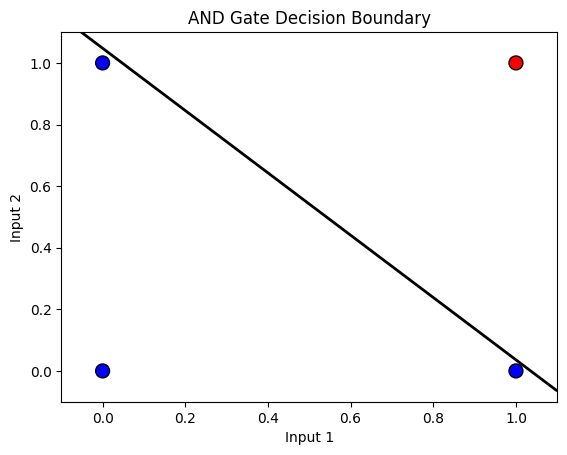

In [327]:
x1_vals = np.linspace(-0.1, 1.1, 100)
x2_vals = np.linspace(-0.1, 1.1, 100)
x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)

z = final_weights[0:1] * x1_grid + final_weights[1:2] * x2_grid + final_bias

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o', s=100, edgecolors='black')
plt.contour(x1_grid, x2_grid, z, levels=[0], colors='black', linewidths=2)

plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("AND Gate Decision Boundary")
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)


plt.show()
